In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
public=pd.read_csv("survey_results_public.csv")
schema=pd.read_csv("survey_results_schema.csv")

In [4]:
public.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [18]:
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [20]:
public.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [10]:
total_respondents = public['ResponseId'].nunique()
print(f"Total number of respondents to the survey: {total_respondents}")

Total number of respondents to the survey: 73268


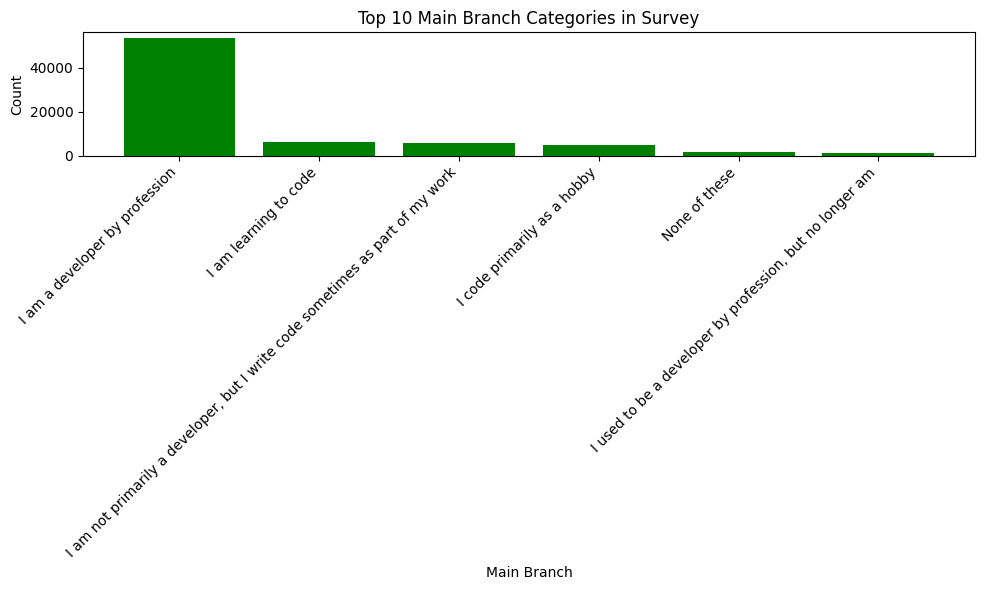

In [15]:
main_branch_counts=public["MainBranch"].value_counts()
main_branch_percent=main_branch_counts/main_branch_counts.sum()*100

main_branch_df=pd.DataFrame({
    "MainBranch":main_branch_counts.index,
    "Count":main_branch_counts.values,
    "Percentage":main_branch_percent.values
})
plt.figure(figsize=(10,6))
plt.bar(main_branch_df["MainBranch"],main_branch_df["Count"].head(10),color="green")
plt.xlabel('Main Branch')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Main Branch Categories in Survey')
plt.tight_layout()
plt.show()

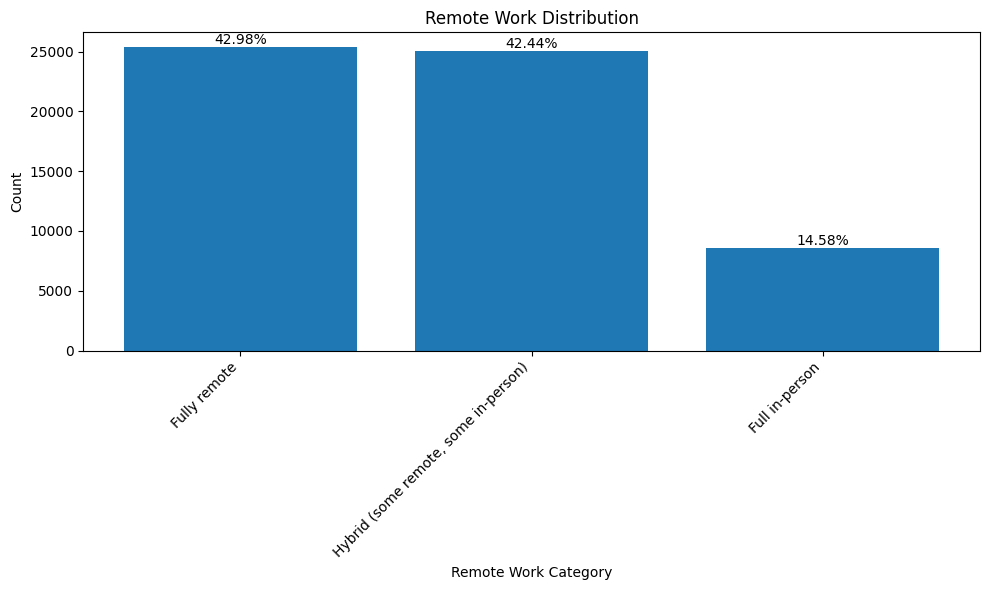

In [17]:
remote_work_disturbation=public["RemoteWork"].dropna().value_counts()

remote_work_percentage=remote_work_disturbation/remote_work_disturbation.sum()*100


remote_work_df=pd.DataFrame({
    'RemoteWork':remote_work_disturbation.index,
    'Count':remote_work_disturbation.values,
    'Percentage':remote_work_percentage.values
})


plt.figure(figsize=(10,6))
bars=plt.bar(remote_work_df['RemoteWork'],remote_work_df['Count'])


for bar ,percentage in zip (bars,remote_work_df['Percentage']):
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Remote Work Category')
plt.ylabel('Count')
plt.title('Remote Work Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

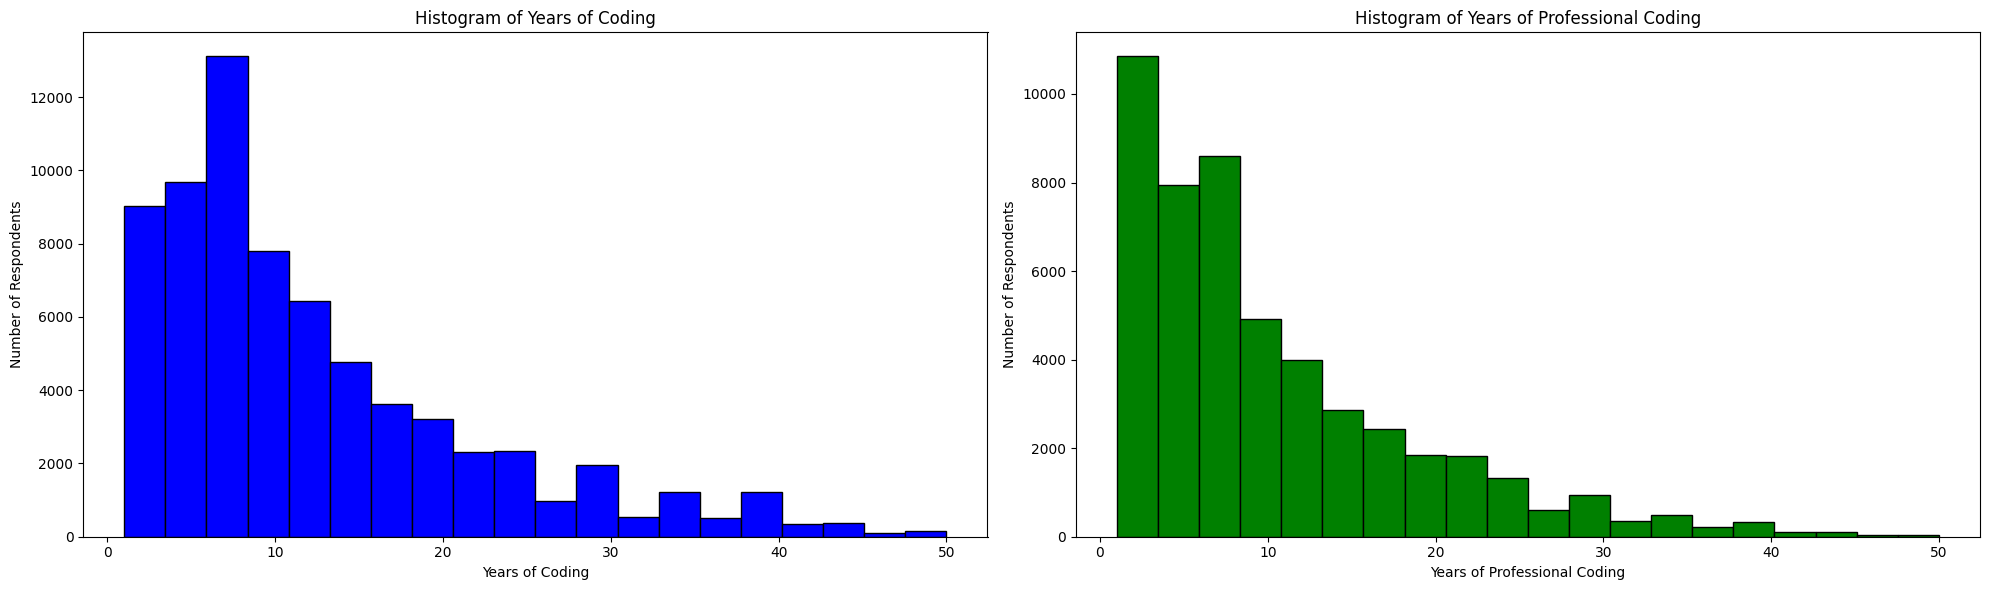

In [22]:
years_code=public["YearsCode"].dropna().apply(lambda x:pd.to_numeric(x, errors="coerce")).dropna()

years_code_pro=public["YearsCodePro"].dropna().apply(lambda x:pd.to_numeric(x , errors="coerce")).dropna()

fig , axs =plt.subplots(1,2, figsize=(20,6))

axs[0].hist(years_code,bins=20,color="blue",edgecolor="black")
axs[0].set_xlabel('Years of Coding')
axs[0].set_ylabel('Number of Respondents')
axs[0].set_title('Histogram of Years of Coding')

# Second subplot for 'Years of Professional Coding'
axs[1].hist(years_code_pro, bins=20, color='green', edgecolor='black')
axs[1].set_xlabel('Years of Professional Coding')
axs[1].set_ylabel('Number of Respondents')
axs[1].set_title('Histogram of Years of Professional Coding')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()